In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
# merge all treated csv files to one dataframe 
# note there should be 435 rows for the 435 congressional districts
path = r'Treated_Data'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    li.append(df)

votes_df = pd.concat(li, axis=0, ignore_index=True)

In [4]:
votes_df

,Unnamed: 0,CD,Biden,Trump,Total,Percentage_for_Biden,Voting_Age_Population,Voting_Rate
0,0,ak_1,153778.0,189951.0,357569.0,43.006525,532244.0,67.181406
1,0,al_1,115683.0,208367.0,327409.0,35.332871,544464.0,60.134187
2,1,al_2,70484.0,174437.0,247311.0,28.500148,516295.0,47.901103
3,2,al_3,98663.0,191488.0,293111.0,33.660627,543854.0,53.895163
4,3,al_4,49904.0,234143.0,286768.0,17.402221,515701.0,55.607416
...,...,...,...,...,...,...,...,...
430,7,wi_8,174136.0,241140.0,421811.0,41.282944,556205.0,75.837326
431,0,wv_1,81849.0,183904.0,270510.0,30.257292,486327.0,55.623068
432,1,wv_2,92623.0,184784.0,282556.0,32.780405,487208.0,57.994943
433,2,wv_3,61512.0,176694.0,241586.0,25.461740,457623.0,52.791490


In [5]:
votes_df = votes_df[['CD', 'Biden', 'Trump', 'Total', 'Percentage_for_Biden', 'Voting_Age_Population', 'Voting_Rate']]

In [6]:
votes_df

,CD,Biden,Trump,Total,Percentage_for_Biden,Voting_Age_Population,Voting_Rate
0,ak_1,153778.0,189951.0,357569.0,43.006525,532244.0,67.181406
1,al_1,115683.0,208367.0,327409.0,35.332871,544464.0,60.134187
2,al_2,70484.0,174437.0,247311.0,28.500148,516295.0,47.901103
3,al_3,98663.0,191488.0,293111.0,33.660627,543854.0,53.895163
4,al_4,49904.0,234143.0,286768.0,17.402221,515701.0,55.607416
...,...,...,...,...,...,...,...
430,wi_8,174136.0,241140.0,421811.0,41.282944,556205.0,75.837326
431,wv_1,81849.0,183904.0,270510.0,30.257292,486327.0,55.623068
432,wv_2,92623.0,184784.0,282556.0,32.780405,487208.0,57.994943
433,wv_3,61512.0,176694.0,241586.0,25.461740,457623.0,52.791490


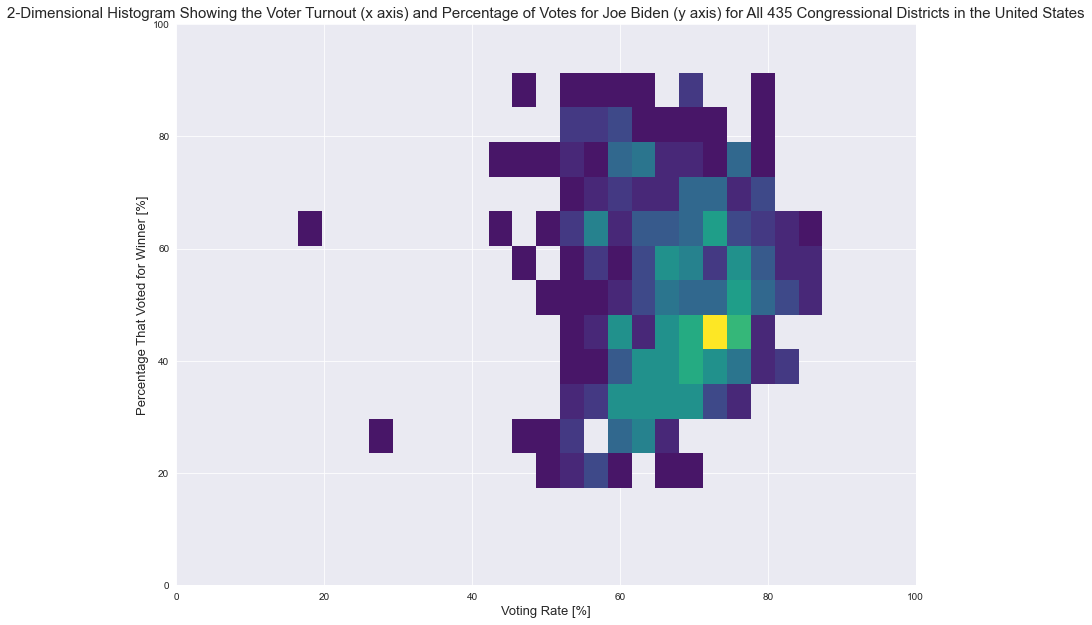

In [7]:
sns.displot(votes_df, x='Voting_Rate', y='Percentage_for_Biden', cmap = 'viridis', height=8.5, aspect=11/8.5)
plt.title('2-Dimensional Histogram Showing the Voter Turnout (x axis) and Percentage of Votes for Joe Biden (y axis) for All 435 Congressional Districts in the United States', fontdict={'fontsize': 15})
plt.xlabel('Voting Rate [%]',size=13)
plt.xticks()
plt.ylabel('Percentage That Voted for Winner [%]', size=13)
plt.xlim(0,100)
plt.ylim(0,100)
plt.savefig('vote_distribution.png', format='png')

# cumulative percentage

In [8]:
votes_df['Congressional_District_for_Biden_as_Fraction_of_Total'] = (votes_df['Biden']/votes_df['Total'].sum()) * 100

In [9]:
votes_df.head()

,CD,Biden,Trump,Total,Percentage_for_Biden,Voting_Age_Population,Voting_Rate,Congressional_District_for_Biden_as_Fraction_of_Total
0,ak_1,153778.0,189951.0,357569.0,43.006525,532244.0,67.181406,0.097777
1,al_1,115683.0,208367.0,327409.0,35.332871,544464.0,60.134187,0.073555
2,al_2,70484.0,174437.0,247311.0,28.500148,516295.0,47.901103,0.044816
3,al_3,98663.0,191488.0,293111.0,33.660627,543854.0,53.895163,0.062733
4,al_4,49904.0,234143.0,286768.0,17.402221,515701.0,55.607416,0.031730


In [10]:
votes_df['Cumulative_Sum_for_Biden'] = votes_df.Congressional_District_for_Biden_as_Fraction_of_Total.cumsum()

In [11]:
votes_df.head()

,CD,Biden,Trump,Total,Percentage_for_Biden,Voting_Age_Population,Voting_Rate,Congressional_District_for_Biden_as_Fraction_of_Total,Cumulative_Sum_for_Biden
0,ak_1,153778.0,189951.0,357569.0,43.006525,532244.0,67.181406,0.097777,0.097777
1,al_1,115683.0,208367.0,327409.0,35.332871,544464.0,60.134187,0.073555,0.171331
2,al_2,70484.0,174437.0,247311.0,28.500148,516295.0,47.901103,0.044816,0.216147
3,al_3,98663.0,191488.0,293111.0,33.660627,543854.0,53.895163,0.062733,0.278880
4,al_4,49904.0,234143.0,286768.0,17.402221,515701.0,55.607416,0.031730,0.310610


In [12]:
votes_df['Congressional_Districts_Total_as_Fraction_of_Total'] = (votes_df['Total']/votes_df['Total'].sum()) * 100

In [13]:
votes_df['Cumulative_Sum_Total'] = votes_df.Congressional_Districts_Total_as_Fraction_of_Total.cumsum()

In [14]:
votes_df.head()

,CD,Biden,Trump,Total,Percentage_for_Biden,Voting_Age_Population,Voting_Rate,Congressional_District_for_Biden_as_Fraction_of_Total,Cumulative_Sum_for_Biden,Congressional_Districts_Total_as_Fraction_of_Total,Cumulative_Sum_Total
0,ak_1,153778.0,189951.0,357569.0,43.006525,532244.0,67.181406,0.097777,0.097777,0.227353,0.227353
1,al_1,115683.0,208367.0,327409.0,35.332871,544464.0,60.134187,0.073555,0.171331,0.208176,0.435529
2,al_2,70484.0,174437.0,247311.0,28.500148,516295.0,47.901103,0.044816,0.216147,0.157248,0.592777
3,al_3,98663.0,191488.0,293111.0,33.660627,543854.0,53.895163,0.062733,0.278880,0.186369,0.779145
4,al_4,49904.0,234143.0,286768.0,17.402221,515701.0,55.607416,0.031730,0.310610,0.182335,0.961481


In [15]:
cum_sum = votes_df[['Cumulative_Sum_Total', 'Cumulative_Sum_for_Biden']]

(0.0, 100.0)

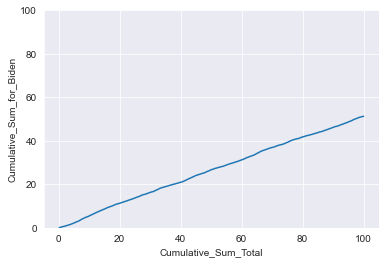

In [16]:
g = sns.lineplot(data=cum_sum, x='Cumulative_Sum_Total', y='Cumulative_Sum_for_Biden')
g.set_ylim(0, 100)

<AxesSubplot:xlabel='Voting_Rate', ylabel='Percentage_for_Biden'>

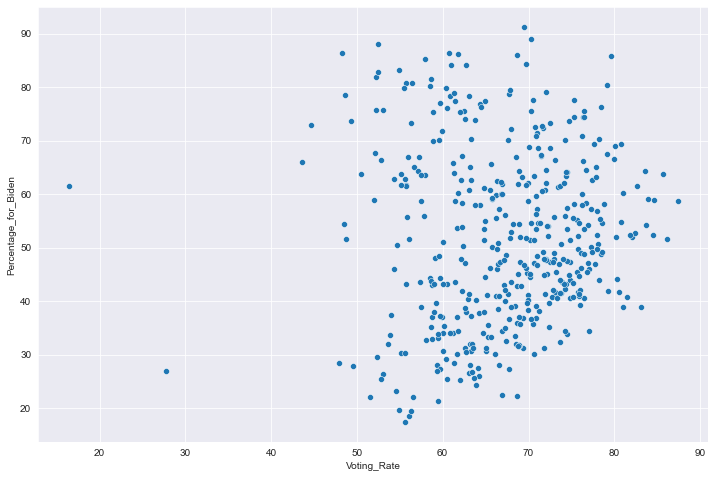

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=votes_df, x='Voting_Rate', y='Percentage_for_Biden')

C:\Users\Patrick\AppData\Local\Temp/ipykernel_16912/2220236048.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_xticklabels(x, fontsize=13)
C:\Users\Patrick\AppData\Local\Temp/ipykernel_16912/2220236048.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_yticklabels(y, fontsize=13)


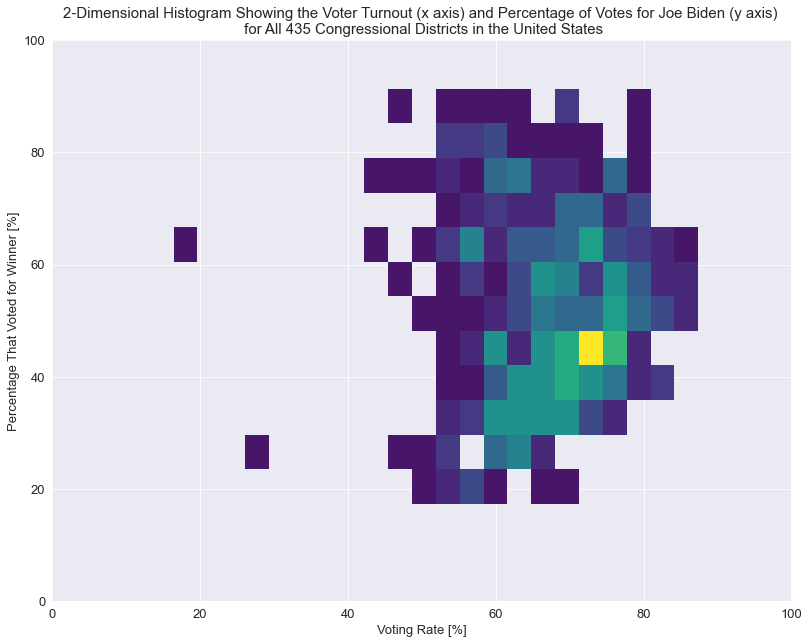

In [42]:
x = list(np.arange(0, 120, 20))
y = list(np.arange(0, 120, 20))

g = sns.displot(
    votes_df, 
    x='Voting_Rate', 
    y='Percentage_for_Biden', 
    cmap = 'viridis', 
    height=8.5, 
    aspect=11/8.5)

g.ax.set_title("2-Dimensional Histogram Showing the Voter Turnout (x axis) and Percentage of Votes for Joe Biden (y axis) \n for All 435 Congressional Districts in the United States", fontdict={'fontsize': 15})
g.ax.set_xlabel('Voting Rate [%]',size=13)
g.ax.set_ylabel('Percentage That Voted for Winner [%]', size=13)
g.ax.set_xticklabels(x, fontsize=13)
g.ax.set_yticklabels(y, fontsize=13)
g.ax.set_xlim(0,100)
g.ax.set_ylim(0,100)
g.savefig('vote_distribution.png', format='png')

C:\Users\Patrick\AppData\Local\Temp/ipykernel_16912/1271430051.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_xticklabels(x, fontsize=13)
C:\Users\Patrick\AppData\Local\Temp/ipykernel_16912/1271430051.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_yticklabels(y, fontsize=13)


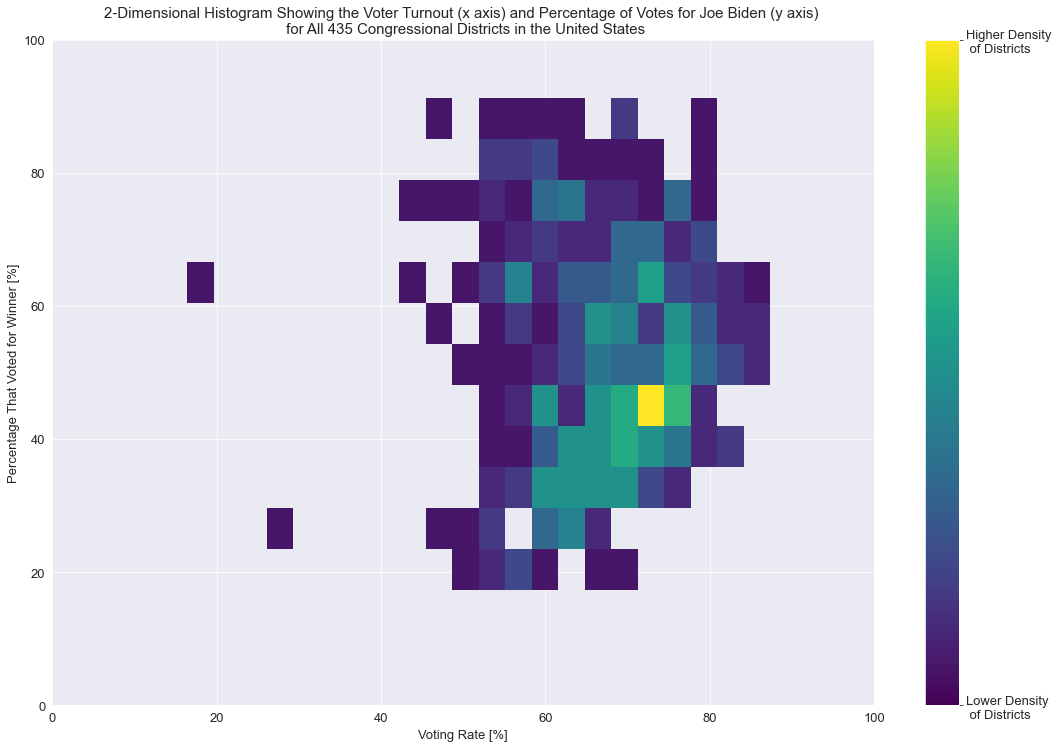

In [63]:
x = list(np.arange(0, 120, 20))
y = list(np.arange(0, 120, 20))

g = sns.displot(
    votes_df, 
    x='Voting_Rate', 
    y='Percentage_for_Biden', 
    cmap = 'viridis', 
    height=10, 
    aspect=15/10, 
    cbar=True)

g.ax.set_title("2-Dimensional Histogram Showing the Voter Turnout (x axis) and Percentage of Votes for Joe Biden (y axis) \n for All 435 Congressional Districts in the United States", fontdict={'fontsize': 15})
g.ax.set_xlabel('Voting Rate [%]',size=13)
g.ax.set_ylabel('Percentage That Voted for Winner [%]', size=13)
g.ax.set_xticklabels(x, fontsize=13)
g.ax.set_yticklabels(y, fontsize=13)
g.ax.set_xlim(0,100)
g.ax.set_ylim(0,100)
cbar = g.ax.collections[0].colorbar
cbar.set_ticks([0, 18])
cbar.set_ticklabels(['Lower Density \n of Districts', 'Higher Density \n of Districts'])
cbar.ax.tick_params(labelsize=13)
g.savefig('vote_distribution_cbar.png', format='png')